In [16]:
import jieba

sent='中文分词是文本处理不可或缺的一步！'

seg_list=jieba.cut(sent,cut_all=True)
print("全模式：","/".join(seg_list))

seg_list=jieba.cut(sent,cut_all=False)
print("精确模式：","/".join(seg_list))

seg_list=jieba.cut(sent)
print("默认精确模式：","/".join(seg_list))

seg_list=jieba.cut_for_search(sent)
print("搜索引擎模式：","/".join(seg_list))

全模式： 中文/分词/是/文本/文本处理/本处/处理/不可/不可或缺/或缺/的/一步/！
精确模式： 中文/分词/是/文本处理/不可或缺/的/一步/！
默认精确模式： 中文/分词/是/文本处理/不可或缺/的/一步/！
搜索引擎模式： 中文/分词/是/文本/本处/处理/文本处理/不可/或缺/不可或缺/的/一步/！


In [17]:
import glob
import random
import jieba

def get_content(path):
    with open(path,'r',encoding='utf-8',errors='ignore') as f:
        content=''
        for l in f:
            l=l.strip()
            content += l
        return content

def get_TF(words,topK=10):
    tf_dic={}
    for w in words:
        tf_dic[w] = tf_dic.get(w,0) + 1
    return sorted(tf_dic.items(),key=lambda x:x[1], reverse=True)[:topK]

def main():
    files = glob.glob('news.txt')
    corpus = [get_content(x) for x in files]

    samp_inx = random.randint(0,len(corpus))

    split_words = list(jieba.cut(corpus[samp_inx]))

    print('样本之一：'+corpus[samp_inx])
    print('分词效果：'+'/'.join(split_words))
    print('样本的topK(10)词:'+str(get_TF(split_words)))

main()


样本之一：近日，《“十四五”现代物流发展规划》（以下简称《规划》）正式发布。这是我国物流领域第一个五年规划，标志着我国物流业已进入到系统整合、转型发展、功能提升的新阶段。未来，现代物流体系该怎么建，发力点在哪里？如何推进物流业增效降本？国家发展改革委日前举行专题发布会，对相关话题进行了回应。新思路促进现代物流发展。现代物流是经济的“经脉”，一头连着生产、一头连着消费，是延伸产业链、提升价值链、打造供应链的重要支撑，在构建现代流通体系、促进形成强大国内市场、推动高质量发展、建设现代化经济体系中发挥着先导性、基础性、战略性作用。国家发展改革委经济贸易司副司长张江波表示，作为推动现代物流发展的纲领性文件，《规划》重点聚焦构建供需适配、内外联通、安全高效、智慧绿色的现代物流体系，对“十四五”时期现代物流发展提出一系列新思路、新要求，对现代物流体系建设也作出一系列具有创新性、前瞻性、可操作性的重大战略部署——结合我国经济产业布局、现代物流发展空间格局，《规划》提出了构建“四横五纵、两沿十廊”物流大通道：对内建设串接东中西部、连接南北方的“四横五纵”9条国内物流大通道，提升相关城市群、口岸城市物流综合服务能力和规模化运行效率；对外建设“两沿十廊”国际物流大通道，包括沿海、沿边物流走廊以及10条国际物流通道，对接区域全面经济伙伴关系协定（RCEP）等，强化服务共建“一带一路”的多元化国际物流通道辐射能力。结合构建新发展格局的新形势新要求，《规划》将此前已出台相关政策规划中现代物流发挥国民经济发展“基础性、战略性、先导性”作用的表述，调整为“先导性、基础性、战略性”。“看似简单的文字顺序调整，背后隐含着深层次含义。”张江波说，更加重视和充分发挥现代物流先导性作用，创造低成本、高效率物流条件，支撑和推动产业布局调整、要素配置优化、发展模式创新，建设更为合理、更加均衡的区域经济发展格局，有助于加快形成强大国内市场，支撑构建陆海内外联动、东西双向互济的开放格局。张江波说，发展现代物流的最终目的和主要成效，集中体现在支撑带动区域经济社会发展上。《规划》提出了“培育发展物流经济”，旨在促进现代物流与区域经济互促发展、良性互动。一方面，依托国家物流枢纽、国家骨干冷链物流基地等重大物流设施，集聚物流要素资源，带动相关产业要素资源集聚融合，打造具有区域集聚辐射能力的产业集群，发展壮大物流枢纽经济；

In [21]:
def main():
    global split_words
    
    files = glob.glob('news.txt')
    corpus = [get_content(x) for x in files]

    samp_inx = random.randint(0,len(corpus))

    stop_words=['。','、','的','“','”','，']
    
    split_words = list(x for x in jieba.cut(corpus[samp_inx])if x not in stop_words)

    print('样本之一：'+corpus[samp_inx])
    print('分词效果：'+'/'.join(split_words))
    print('样本的topK(10)词:'+str(get_TF(split_words)))

main()


样本之一：近日，《“十四五”现代物流发展规划》（以下简称《规划》）正式发布。这是我国物流领域第一个五年规划，标志着我国物流业已进入到系统整合、转型发展、功能提升的新阶段。未来，现代物流体系该怎么建，发力点在哪里？如何推进物流业增效降本？国家发展改革委日前举行专题发布会，对相关话题进行了回应。新思路促进现代物流发展。现代物流是经济的“经脉”，一头连着生产、一头连着消费，是延伸产业链、提升价值链、打造供应链的重要支撑，在构建现代流通体系、促进形成强大国内市场、推动高质量发展、建设现代化经济体系中发挥着先导性、基础性、战略性作用。国家发展改革委经济贸易司副司长张江波表示，作为推动现代物流发展的纲领性文件，《规划》重点聚焦构建供需适配、内外联通、安全高效、智慧绿色的现代物流体系，对“十四五”时期现代物流发展提出一系列新思路、新要求，对现代物流体系建设也作出一系列具有创新性、前瞻性、可操作性的重大战略部署——结合我国经济产业布局、现代物流发展空间格局，《规划》提出了构建“四横五纵、两沿十廊”物流大通道：对内建设串接东中西部、连接南北方的“四横五纵”9条国内物流大通道，提升相关城市群、口岸城市物流综合服务能力和规模化运行效率；对外建设“两沿十廊”国际物流大通道，包括沿海、沿边物流走廊以及10条国际物流通道，对接区域全面经济伙伴关系协定（RCEP）等，强化服务共建“一带一路”的多元化国际物流通道辐射能力。结合构建新发展格局的新形势新要求，《规划》将此前已出台相关政策规划中现代物流发挥国民经济发展“基础性、战略性、先导性”作用的表述，调整为“先导性、基础性、战略性”。“看似简单的文字顺序调整，背后隐含着深层次含义。”张江波说，更加重视和充分发挥现代物流先导性作用，创造低成本、高效率物流条件，支撑和推动产业布局调整、要素配置优化、发展模式创新，建设更为合理、更加均衡的区域经济发展格局，有助于加快形成强大国内市场，支撑构建陆海内外联动、东西双向互济的开放格局。张江波说，发展现代物流的最终目的和主要成效，集中体现在支撑带动区域经济社会发展上。《规划》提出了“培育发展物流经济”，旨在促进现代物流与区域经济互促发展、良性互动。一方面，依托国家物流枢纽、国家骨干冷链物流基地等重大物流设施，集聚物流要素资源，带动相关产业要素资源集聚融合，打造具有区域集聚辐射能力的产业集群，发展壮大物流枢纽经济；

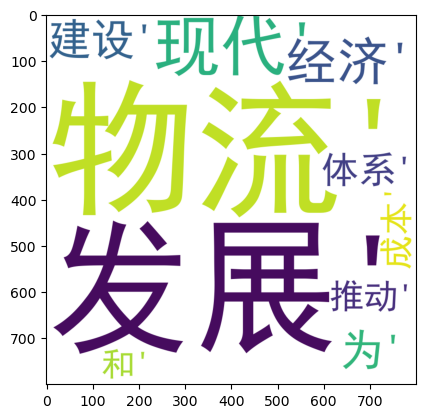

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words_list=str(get_TF(split_words))
cloud_im = WordCloud(background_color="white",\
                    width=800,\
                   height=800,
                   font_path='simhei.ttf',
                   ).generate(words_list)
plt.imshow(cloud_im)